In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import numpy as np




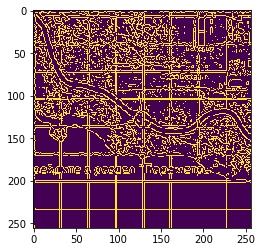

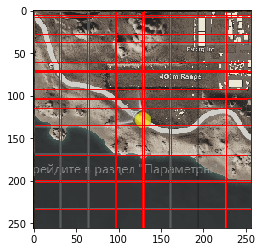

[[  2 234 255 234]
 [  2 232 255 232]
 [  2 202 255 202]
 [  2 200 255 200]
 [  2 103 255 103]
 [  2 105 250 105]
 [  2  72 255  72]
 [  0   6 255   6]
 [  1  93 252  93]
 [225 255 225   2]
 [  2  38 255  38]
 [160 255 160   2]
 [ 98 255  98   2]
 [ 96 255  96   2]
 [130 255 130   1]
 [  2  73 255  73]
 [227 255 227   2]
 [ 64 255  64   1]
 [  2 138 252 138]
 [  2  71 251  71]
 [ 66 255  66   3]
 [128 255 128   2]
 [162 255 162   2]
 [  2 170 251 170]
 [ 33 255  33   2]
 [ 31 255  31   2]
 [  2 135 255 135]
 [  2   8 255   8]
 [  2  61 253  61]
 [  2  28 254  28]
 [  1 115 245 115]]


In [3]:
def draw_lines(img,lines,color = [255,255,255]):
    if lines is not None:
        for coords in lines:
            coords = coords.astype(np.int32)
            cv2.line(img, (coords[0], coords[1]), (coords[2], coords[3]), color, 1)

path =  '..\\screenshot_detect\\data\\'  
path_bad = '../assets/bad_gps/'
img_files = [path_bad + x for x in os.listdir(path_bad)]
img_files

img = plt.imread(img_files[0])            
img = (img[:,:,:3]*255).astype(np.uint8)
map_coords = (794,1626)
map_dim = (256,256)
minimap = img[map_coords[0]:map_coords[0]+map_dim[0],map_coords[1]:map_coords[1]+map_dim[1]].copy()
# minimap_filtered = cv2.bilateralFilter(minimap,3,75,75)
minimap_edges = cv2.Canny(minimap, threshold1 = 100, threshold2=100)
lines = cv2.HoughLinesP(minimap_edges,
                        rho = 1.1,
                        theta = 90*np.pi/180,
                        threshold = 125,
                        minLineLength = 200,
                        maxLineGap = 200)
lines = lines[:,0,:]
line_angles = np.arctan2(lines[:,2] - lines[:,0] , lines[:,1] - lines[:,3])*180/3.14
draw_lines(minimap,lines,[255,0,0])
plt.imshow(minimap_edges)
plt.show()
plt.imshow(minimap)
plt.show()
print(lines)


In [5]:
vert_lines = lines[np.abs(line_angles)<0.05]
hor_lines = lines[np.abs(line_angles-90)<0.05]
vert_lines

x=[]
for xi  in np.sort(hor_lines[:,1]):
    if len(x)==0:
        x.append(xi)
    else:
        if xi - x[-1] < 20:
            x[-1] = x[-1]*0.5 + xi*0.5
        else:
            x.append(xi)
            
y=[]
for yi  in np.sort(vert_lines[:,0]):
    if len(y)==0:
        y.append(yi)
    else:
        if yi - y[-1] < 20:
            y[-1] = y[-1]*0.5 + yi*0.5
        else:
            y.append(yi)
print(x)
print(y)
all_dif = np.hstack([np.diff(y),np.diff(x)])
print(all_dif)
np.median(np.hstack([np.diff(y),np.diff(x)]))

[7.0, 33.0, 71.0, 108.25, 136.5, 170, 201.0, 233.0]
[32.0, 65.0, 97.0, 129.0, 161.0, 226.0]
[33.   32.   32.   32.   65.   26.   38.   37.25 28.25 33.5  31.   32.  ]


32.0

In [6]:
def get_minimap(img):
    map_coords = (794,1626)
    map_dim = (256,256)
    return img[map_coords[0]:map_coords[0]+map_dim[0],map_coords[1]:map_coords[1]+map_dim[1]].copy()
    

def get_minimap_meters_per_pixel(minimap):
    minimap_edges = cv2.Canny(minimap, threshold1 = 100, threshold2=100)
    lines = cv2.HoughLinesP(minimap_edges,
                            rho = 1.1,
                            theta = 90*np.pi/180,
                            threshold = 125,
                            minLineLength = 200,
                            maxLineGap = 200)
    lines = lines[:,0,:]
    line_angles = np.arctan2(lines[:,2] - lines[:,0] , lines[:,1] - lines[:,3])*180/3.14
    
    vert_lines = lines[np.abs(line_angles)<0.05]
    hor_lines = lines[np.abs(line_angles-90)<0.05]
    vert_lines

    x=[]
    for xi  in np.sort(hor_lines[:,1]):
        if len(x)==0:
            x.append(xi)
        else:
            if xi - x[-1] <20:
                x[-1] = x[-1]*0.5 + xi*0.5
            else:
                x.append(xi)

    y=[]
    for yi  in np.sort(vert_lines[:,0]):
        if len(y)==0:
            y.append(yi)
        else:
            if yi - y[-1] <20:
                y[-1] = y[-1]*0.5 + yi*0.5
            else:
                y.append(yi)

    all_dif = np.hstack([np.diff(y),np.diff(x)])

    return 100/np.median(all_dif)
    
    

2.3255813953488373

In [8]:
map_files = ['..\\assets\\map\\low_res\\' + x for x in os.listdir('..\\assets\\map\\low_res\\')]
map_image_camp = (plt.imread(map_files[0])*255).astype(np.uint8)
map_resize_factor = 0.5
map_image = cv2.resize(map_image_camp,(0,0), fx = map_resize_factor, fy =map_resize_factor)   
camp_map_size_meters = 2000
map_meters_per_pixel = camp_map_size_meters / map_image.shape[0]

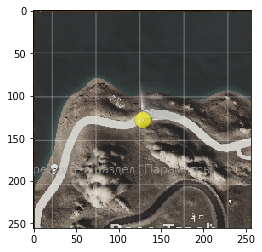

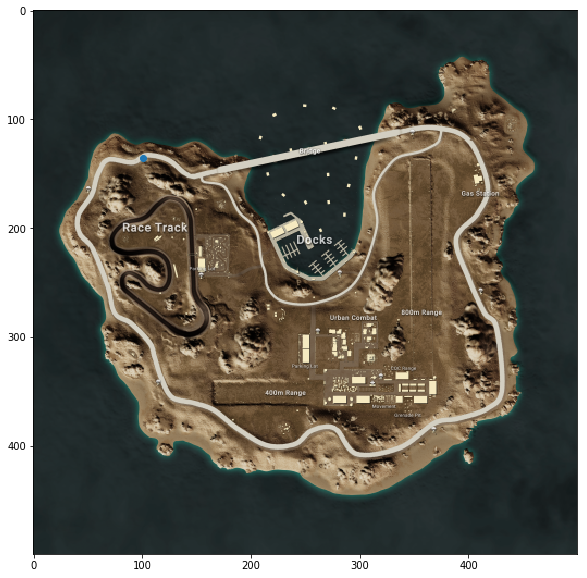

(100.36633663366337, 135.87128712871288, array([128, 127]))

In [20]:
img_files = [path_bad + x for x in os.listdir(path_bad)]
img = plt.imread(img_files[8])
img = (img[:,:,:3]*255).astype(np.uint8)

minimap = get_minimap(img)
scale_factor = get_minimap_meters_per_pixel(minimap)/map_meters_per_pixel
scaled_minimap  =  cv2.resize(minimap,(0,0), fx = scale_factor, fy =scale_factor)

pl_point_img = plt.imread('player_point.jpg')

res = cv2.matchTemplate(minimap.astype(np.uint8),pl_point_img.astype(np.uint8),cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
player_offset = np.array(min_loc) + np.array([7,7])

res = cv2.matchTemplate(map_image.astype(np.uint8),scaled_minimap.astype(np.uint8),cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
x,y = np.array(min_loc) + player_offset*scale_factor


plt.imshow(minimap)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(map_image)
plt.scatter(x,y)
plt.show()
x,y,player_offset

In [9]:
map_files

['..\\map\\low_res\\Camp_Jackal_Main_Low_Res.png',
 '..\\map\\low_res\\Miramar_Main_Low_Res.png']

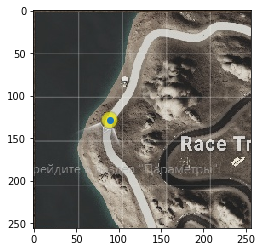

In [53]:

plt.imshow(minimap)
plt.scatter(x,y)
plt.show()

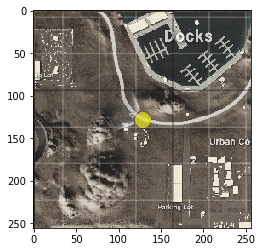

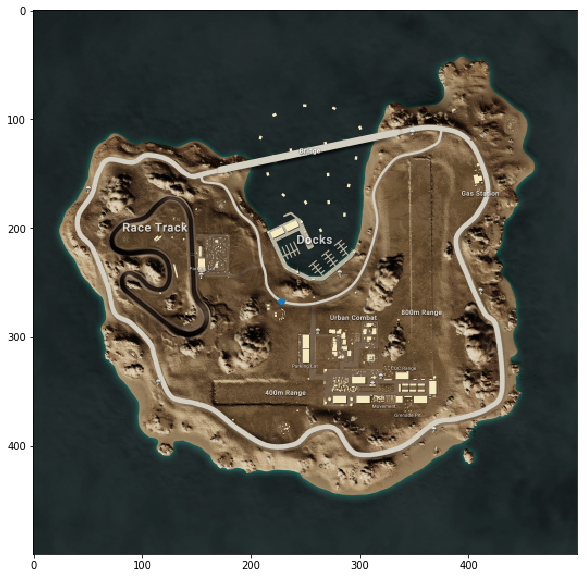

(227.4186046511628, 267.4186046511628)

In [295]:
img_files = ['..\\screenshot_detect\\data\\' + x for x in os.listdir('..\\screenshot_detect\\data')]
img = plt.imread(img_files[0])
get_global_position(img,2000/500)

array([227.41860465, 267.41860465])

In [279]:
%%timeit
get_global_position(img,2000/500)

24.2 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [92]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import numpy as np

def get_minimap(img):
    map_coords = (794,1626)
    map_dim = (256,256)
    return img[map_coords[0]:map_coords[0]+map_dim[0],map_coords[1]:map_coords[1]+map_dim[1]].copy()
    

def get_minimap_meters_per_pixel(minimap):
    minimap_edges = cv2.Canny(minimap, threshold1 = 100, threshold2=100)
    lines = cv2.HoughLinesP(minimap_edges,
                            rho = 1.1,
                            theta = 90*np.pi/180,
                            threshold = 125,
                            minLineLength = 200,
                            maxLineGap = 200)
    lines = lines[:,0,:]
    line_angles = np.arctan2(lines[:,2] - lines[:,0] , lines[:,1] - lines[:,3])*180/3.14
    
    vert_lines = lines[np.abs(line_angles)<0.05]
    hor_lines = lines[np.abs(line_angles-90)<0.05]
    vert_lines

    x=[]
    for xi  in np.sort(hor_lines[:,1]):
        if len(x)==0:
            x.append(xi)
        else:
            if xi - x[-1] < 10:
                x[-1] = x[-1]*0.5 + xi*0.5
            else:
                x.append(xi)

    y=[]
    for yi  in np.sort(vert_lines[:,0]):
        if len(y)==0:
            y.append(yi)
        else:
            if yi - y[-1] < 10:
                y[-1] = y[-1]*0.5 + yi*0.5
            else:
                y.append(yi)

    all_dif = np.hstack([np.diff(y),np.diff(x)])

    return 100/np.median(all_dif)

class minimap_gps(object):
    
    map_files =  {'camp_jackal' : '..\\map\\low_res\\Camp_Jackal_Main_Low_Res.png',
                  'miramar'     : '..\\map\\low_res\\Miramar_Main_Low_Res.png'}
    
    map_size_meters = {'camp_jackal' : 2000,
                       'miramar'     : 8000}
    
    def __init__(self,map_name, map_scale = 0.5):
        assert map_name in self.map_files, 'Wrong map name'
        self.map_image =(plt.imread(self.map_files[map_name])*255).astype(np.uint8)
        self.map_image = cv2.resize(self.map_image,(0,0), fx = map_scale, fy =map_scale)   
        self.map_meters_per_pixel = self.map_size_meters[map_name] / self.map_image.shape[0]
        self.player_point_img = plt.imread('player_point.jpg').astype(np.uint8)
        
    def find_template(self,img,template):
        res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        return np.array(min_loc),min_val
    
    def get_position(self,img,return_confidence = False):
        'by full screenshot returns on-map player position in meters'
        minimap = get_minimap(img)
        scale_factor = get_minimap_meters_per_pixel(minimap)/self.map_meters_per_pixel
        scaled_minimap  =  cv2.resize(minimap,(0,0), fx = scale_factor, fy =scale_factor)

        player_offset = self.find_template(minimap,self.player_point_img)[0] + np.array([7,7])
        
        minimap_pos,conf =  self.find_template(self.map_image,scaled_minimap)
        
        player_position = minimap_pos + player_offset*scale_factor
        
        if return_confidence:
            return player_position*self.map_meters_per_pixel,1-conf
        else:
            return player_position*self.map_meters_per_pixel
        

In [7]:
import os


[182.69230769 722.15384615] 0.913815051317215


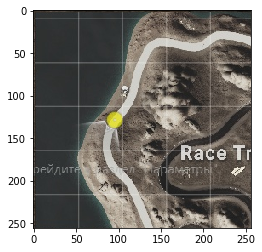

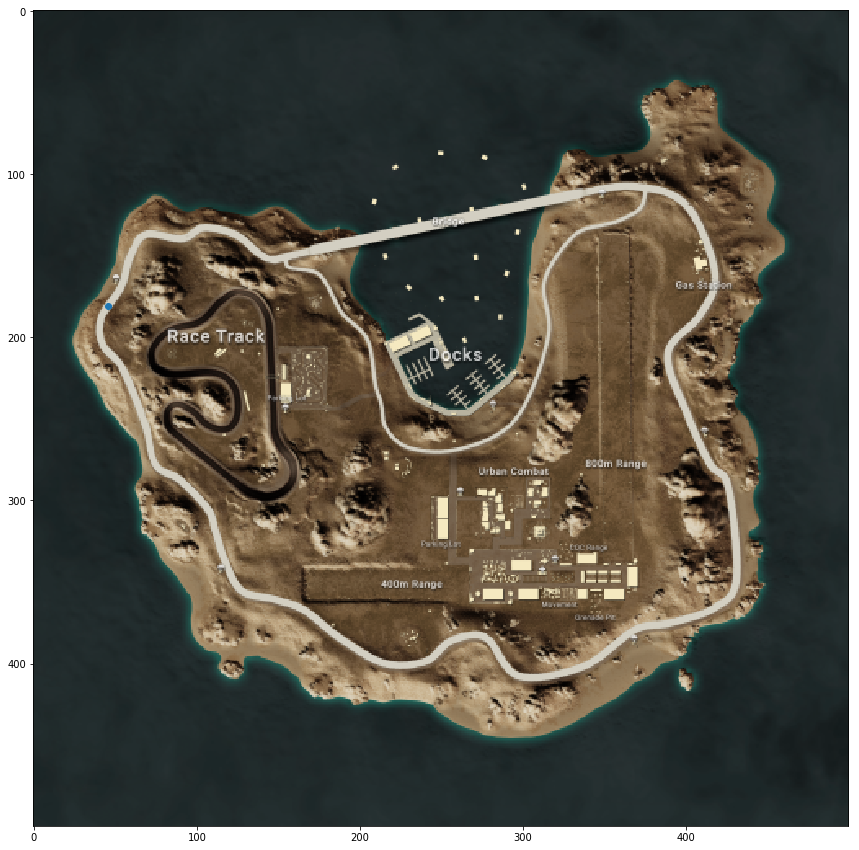

In [93]:


img_files = ['..\\screenshot_detect\\data\\' + x for x in os.listdir('..\\screenshot_detect\\data')]
img = plt.imread(img_files[32])

gps = minimap_gps('camp_jackal')
pos,conf = gps.get_position(img,return_confidence = True)
print (pos, conf)

plt.imshow(get_minimap(img))
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(gps.map_image)
x,y = pos/gps.map_meters_per_pixel
plt.scatter(x,y)
plt.show()


In [94]:
minimap_gps.get_position?